---
title: "Modul 3 Sains Data: Model Regresi"
subtitle: "Regresi Linier Sederhana, Regresi Linier Berganda, dan Regresi Logistik"
image: static\regresi.png
description: "Offline di Departemen Matematika"
date: 17/03/2025
page-navigation: true
format: html
---

Kembali ke [Sains Data](./saindat2025genap.qmd)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Pada pertemuan kali ini, kita akan membahas tentang salah satu metode *machine learning*, yaitu **regresi**.

Metode regresi yang paling sering digunakan adalah **regresi linier** *(linear regression)*.

Inti sari dari regresi linier adalah, diberikan sekumpulan data (meliputi satu fitur target yang ingin diprediksi, biasa disebut $y$, serta minimal satu variabel bebas), ingin ditemukan garis yang paling mendekati semua titik.

"Paling mendekati" bisa diukur dengan menjumlahkan (kuadrat dari) semua selisih antara nilai $y$ pada tiap titik dengan nilai $y$ pada garis. (Misalkan fungsi garis ditulis $y = \hat{y}\left(x\right)$. Maka, nilai $y$ pada garis ditulis $\hat{y}\left(x_i\right)$ untuk titik ke-$i$.)

Jika hasil jumlah ini makin kecil, maka garis makin mendekati titik-titiknya. Hasil jumlah ini disebut ***error***, atau di sini lebih tepatnya **SSE** *(sum of squared errors)*:

$$\text{SSE = } \sum_{i=1}^{n} \left( y_i - \hat{y}\left(x_i\right) \right)^2$$

Maka, tujuan dari regresi linier adalah menemukan garis yang meminimalkan *error*, yaitu meminimalkan SSE. Fungsi yang ingin diminimalkan (di sini SSE) biasa disebut **fungsi objektif** *(objective function)* di dunia optimasi, atau seringkali disebut ***loss function*** di dunia sains data / pembelajaran mesin *(machine learning)*.

Regresi linier umumnya terbagi lagi menjadi dua jenis, yaitu


- regresi linier sederhana *(simple linear regression)* ketika hanya ada satu variabel bebas $x$
- regresi linier berganda *(multiple linear regression)* ketika ada sejumlah variabel bebas $x_1, x_2, \dots, x_n$

Banyak metode regresi lainnya yang sebenarnya dibangun di atas regresi linier, contohnya regresi polinomial *(polynomial regression)*. Intinya sama: mencoba mencari bentuk fungsi tertentu yang paling cocok dengan sekumpulan data yang diberikan, baik untuk urusan deskripsi maupun prediksi.

# Import Dataset

Sebelum mulai, seperti biasa, kita perlu meng-*import* dataset terlebih dahulu.

Untuk praktikum kali ini, kita akan melanjutkan dataset minggu lalu, California Housing Prices, yang sudah dilakukan imputasi. Silakan *download* `housing_modified.csv` berikut:

* [Direct link: housing_modified.csv](./housing_modified.csv)

Kemudian *read* dengan pandas seperti biasa:

In [2]:
df = pd.read_csv("./housing_modified.csv")

In [3]:
df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [4]:
df = df.drop(df.columns[0], axis=1)

In [5]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


Pastikan sudah tidak ada *missing value*:

In [6]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

Untuk dataset ini, fitur target utama yang ingin diprediksi adalah harga rumah, yaitu `median_house_value`. Kita bisa memisahkan antara fitur target tersebut, misal $y$, dengan fitur-fitur lainnya, misal $X$ besar.

In [7]:
X = df.drop(columns=["median_house_value"])
y = df[["median_house_value"]]

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0,1.0,0.0,0.0,0.0


In [9]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


# Train-Test Split

Inti sari dari *machine learning* adalah membuat "model" yang bisa belajar dari pola, dan kemudian bisa menghasilkan prediksi yang akurat berdasarkan pola tersebut.

Sehingga, untuk menguji apakah model kita sudah bagus, fokus kita adalah menguji **seberapa baik model bisa memprediksi**.

* Di satu sisi, model *machine learning* memerlukan data, yang dengan data tersebut, model akan terbentuk dengan "latihan", mencoba memahami pola yang ada di data tersebut.
* Di sisi lain, untuk menguji kemampuan model memprediksi, perlu ada juga data acuan sehingga hasil prediksi model bisa dibandingkan dengan data aslinya (yaitu data acuan tersebut).

Data untuk "latihan" disebut data *training* ***(training data)***, dan data acuan untuk menguji kemampuan prediksi disebut data *testing* ***(test data)***.

Tentunya, kedua data ini harus saling lepas (tidak memiliki irisan), agar tidak terjadi yang namanya *data leakage*. Semisal ada data *training* yang sama persis muncul di data *testing*, kan prediksinya jadi hafalan doang, kegampangan :D

Sebenarnya, regresi tidak terbatas *machine learning*. Kebetulan, regresi juga menjadi pembahasan yang mendalam di kalangan statistika, hingga ada mata kuliah tersendiri yang membahas regresi (Model Linier / Model Linear).

Dalam konteks *machine learning*, regresi linier (sebagai model) mencoba mencari garis yang meminimalkan SSE **menggunakan data *training* saja**, yaitu data yang dimaksudkan untuk membentuk model. Kemudian, garis yang ditemukan (model yang terbentuk) akan diuji kemampuan prediksinya menggunakan data *testing*.

Di dunia nyata, data yang kita peroleh biasanya utuh, satu kesatuan. Padahal, untuk menggunakan *machine learning*, kita memerlukan data *training* dan data *testing*. 

Sehingga, dataset yang utuh tersebut bisa kita pecah sendiri menjadi data *training* dan data *testing*, namanya ***train-test split***.

Kebetulan, scikit-learn menyediakan fungsi untuk melakukan *train-test split*. Mari kita coba. Import dulu:

In [10]:
from sklearn.model_selection import train_test_split

Biasanya, dataset dipisah menjadi data *training* sebanyak 80% dan data *testing* sebanyak 20%. Dalam penggunaan fungsi `train_test_split`, ditulis `test_size=0.2`.

Rasio 80-20 ini sebenarnya hanya kebiasaan saja; paling sering begitu, tapi boleh saja misalnya 70-30 atau bahkan 90-10.

Mengapa jauh lebih banyak data *training*? Tujuannya agar model bisa memahami pola pada data dengan lebih mendalam. Namun, perlu hati-hati juga: kalau data *testing* terlalu sedikit, kita kurang bisa menguji kemampuan prediksi model.

Kalau ragu, langsung gunakan saja rasio 80-20. Sepertinya memang sudah standar, digunakan di mana-mana.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Apa itu *random state*?

Tentunya, kita berharap bahwa *train-test split* dilakukan secara *random* atau sembarang, yaitu tidak berdasarkan pola tertentu, agar apapun pola yang terkandung dalam data *training* itu kurang lebih juga terkandung dalam data *testing*.

Di sisi lain, apabila orang lain ingin mencoba model yang kita buat, tentunya kita juga berharap bahwa dia mendapatkan hasil yang sama.

Apabila *train-test split* benar-benar selalu *random* tiap kali dijalankan, kemungkinan hasil yang diperoleh orang lain akan cukup berbeda dengan hasil yang kita peroleh, padahal modelnya sama.

Oleh karena itu, meskipun kita menginginkan *train-test split* dilakukan secara *random*, kita juga menginginkan cara *random* tersebut adalah selalu cara yang sama. Hal ini bisa kita atur dengan memasang nilai `random_state` yang selalu sama.

Biasanya, `random_state` dipasang nilai 42. Namun, itu hanya kebiasaan saja. Apapun boleh, asalkan konsisten.

Mari kita lihat hasilnya:

In [12]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,0.0,0.0,0.0,0.0,1.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,0.0,0.0,0.0,0.0,1.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,0.0,0.0,0.0,0.0,1.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,0.0,0.0,0.0,0.0,1.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,1.0,0.0,0.0,0.0,0.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,0.0,1.0,0.0,0.0,0.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,1.0,0.0,0.0,0.0,0.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,1.0,0.0,0.0,0.0,0.0


In [13]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20046,-119.01,36.06,25.0,1505.0,537.870553,1392.0,359.0,1.6812,0.0,1.0,0.0,0.0,0.0
3024,-119.46,35.14,30.0,2943.0,537.870553,1565.0,584.0,2.5313,0.0,1.0,0.0,0.0,0.0
15663,-122.44,37.80,52.0,3830.0,537.870553,1310.0,963.0,3.4801,0.0,0.0,0.0,1.0,0.0
20484,-118.72,34.28,17.0,3051.0,537.870553,1705.0,495.0,5.7376,1.0,0.0,0.0,0.0,0.0
9814,-121.93,36.62,34.0,2351.0,537.870553,1063.0,428.0,3.7250,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.000000,1351.0,452.0,4.6050,1.0,0.0,0.0,0.0,0.0
16623,-120.83,35.36,28.0,4323.0,886.000000,1650.0,705.0,2.7266,0.0,0.0,0.0,0.0,1.0
18086,-122.05,37.31,25.0,4111.0,538.000000,1585.0,568.0,9.2298,1.0,0.0,0.0,0.0,0.0
2144,-119.76,36.77,36.0,2507.0,466.000000,1227.0,474.0,2.7850,0.0,1.0,0.0,0.0,0.0


In [14]:
y_train

,median_house_value
14196,103000.0
8267,382100.0
17445,172600.0
14265,93400.0
2271,96500.0
...,...
11284,229200.0
11964,97800.0
5390,222100.0
860,283500.0


In [15]:
y_test

,median_house_value
20046,47700.0
3024,45800.0
15663,500001.0
20484,218600.0
9814,278000.0
...,...
15362,263300.0
16623,266800.0
18086,500001.0
2144,72300.0


# Regresi Linier Sederhana

Untuk satu variabel bebas $x$, rumus garis untuk regresi linier sederhana adalah sebagai berikut:

$$y = \beta_0 + \beta_1 x + \varepsilon \sim NIID(0, \sigma^2)$$

Ingin ditemukan nilai $\beta_0$ dan $\beta_1$ yang meminimalkan SSE.

(Ada juga yang menulis $y = \theta_0 + \theta_1 x$, sama saja)

$\varepsilon$ merupakan error dari model regresi. Error ini bersifat random dan diasumsikan mengikuti Normal Identic Independent Distribution (NIID)
- Error berdistribusi normal, artinya memiliki pola sebaran probabilitas yang sesuai dengan distribusi normal dengan mean 0 dan variansi suatu konstan $\sigma^2$.
- Identik berarti error dari setiap observasi (baris) berdistribusi sama (yaitu normal dengan parameter yang sama)
- Independen artinya error dari setiap observasi saling bebas, atau Cov $(\varepsilon_i, \varepsilon_j)=0$ untuk setiap observasi ke $i\neq j$

Perlu diperhatikan juga bahwa model yang dibangun diatas merupakan model untuk populasi data (jadi bisa dibilang kita mengasumsikan seluruh populasi data mengikuti model tersebut). Pada kenyataannya, kita tidak punya data yang mencakup keseluruhan populasi untuk memeriksa apakah modelnya berlaku. Sehingga kita perlu membuat model yang hanya digunakan untuk data sampel yang kita punya. Secara statistik, kita menyebut model tersebut sebagai model taksiran (dugaan) yang akan di fit dengan data sampel yang kita miliki, yaitu

$$\hat{y}=\hat{\beta}_0+\hat{\beta}_1x+e$$

Jadi tujuan kita sekarang adalah mencari taksiran untuk parameter $\hat{\beta}_0$ dan $\hat{\beta}_1$ tersebut kemudian melakukan prediksi dengan menggunakan model taksiran yang didapat. Setelah itu kita bandingkan hasil prediksi model dengan nilai aslinya menggunakan metrik evaluasi.

Mari kita pilih terlebih dahulu, variabel bebas apa yang ingin kita gunakan.

In [16]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


Sebelum membangun model, kita perlu menentukan fitur mana saja yang ingin kita gunakan sebagai prediktor. Dalam regresi linier sederhana, kita hanya menggunakan satu prediktor, sehingga untuk mendapatkan model yang bagus, kita harus pilih dengan baik fitur mana yang paling memiliki hubungan dengan variabel target. Cara paling sederhana adalah kita bisa melihat korelasi antar setiap fitur prediktor dengan variabel target.

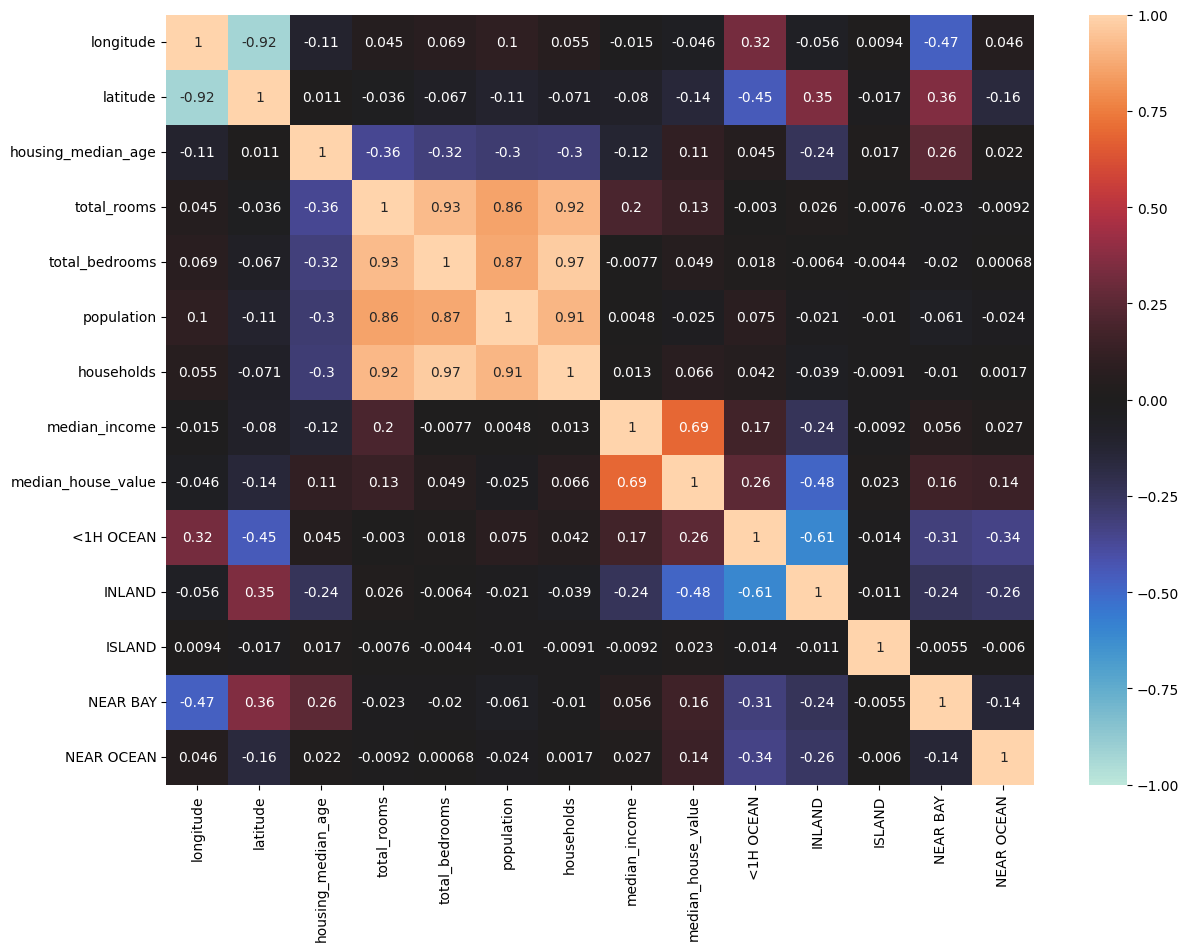

In [ ]:
corr = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(data=corr, vmin=-1, vmax=1, center=0, annot=True)
plt.show()

Dari heatmap diatas, kita bisa lihat bahwa fitur `median_income` memiliki korelasi paling tinggi dengan target `median_house_value`. Kita bisa coba menggunakan fitur `median_income` sebagai prediktor untuk mencoba memprediksi variabel target `median_house_value`. (Asumsinya, mungkin harga rumah kurang lebih berbanding lurus dengan penghasilan.)

In [18]:
x1_train = X_train[["median_income"]]
x1_test = X_test[["median_income"]]

In [19]:
x1_train

,median_income
14196,3.2596
8267,3.8125
17445,4.1563
14265,1.9425
2271,3.5542
...,...
11284,6.3700
11964,3.0500
5390,2.9344
860,5.7192


In [20]:
x1_test

,median_income
20046,1.6812
3024,2.5313
15663,3.4801
20484,5.7376
9814,3.7250
...,...
15362,4.6050
16623,2.7266
18086,9.2298
2144,2.7850


Ada beberapa cara untuk melakukan regresi linier sederhana di Python.

## Regresi Linier Sederhana dengan scikit-learn

In [21]:
from sklearn.linear_model import LinearRegression

`LinearRegression` adalah `class` yang dapat menghasilkan objek (inget-inget lagi materi OOP di praktikum Struktur Data :D), dengan tiap objek itu adalah model regresi linier tersendiri.

Sehingga, untuk membuat model regresi linier, kita buat objeknya terlebih dahulu:

In [22]:
linreg1 = LinearRegression()

*Training* dilakukan dengan *method* `.fit()`

In [23]:
linreg1.fit(x1_train, y_train)

LinearRegression()

Setelah dilakukan `.fit()`, model `linreg1` sudah selesai *training*.

Kita bisa memperoleh nilai parameter $\beta_0$ dan $\beta_1$ melalui atribut `.intercept_` dan `.coef_`

In [ ]:
linreg1.intercept_

array([44459.72916908])

In [ ]:
linreg1.coef_

array([[41933.84939381]])

In [26]:
linreg1_b0 = linreg1.intercept_[0]
linreg1_b1 = linreg1.coef_[0][0]

Taksiran model regresi linier sederhana yang didapat (dalam bentuk $\hat{y}=\hat{\beta_0}+\hat{\beta_1}x$)

In [27]:
print("y =", linreg1_b0, "+", linreg1_b1, "x")

y = 44459.729169078666 + 41933.84939381274 x


Setelah kita dapat taksirannya, kita bisa coba lakukan prediksi dengan *method* `.predict()`

In [28]:
y_pred1 = linreg1.predict(x1_test)

In [29]:
y_pred1

array([[114958.91676996],
       [150606.88213964],
       [190393.71844449],
       ...,
       [431500.77230409],
       [161245.49973085],
       [193412.95560084]])

## Solusi Manual dengan Metode *Least Squares*

Metode *least squares* menyediakan "solusi eksak" (dijamin meminimalkan *loss function*) untuk regresi linier sederhana, sebagai berikut:

$$\hat{\beta}_1 = \frac{n \left( \sum_{i=1}^{n} x_i y_i \right) - \left( \sum_{i=1}^{n} x_i \right) \left( \sum_{i=1}^{n} y_i \right)}{n \left( \sum_{i=1}^{n} \left(x_i\right)^2 \right) - \left( \sum_{i=1}^{n} x_i \right)^2}$$

$$\hat{\beta}_0 = \bar{y} - \beta_1 \bar{x}$$

dengan

$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

$$\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$$

In [30]:
def least_squares_sederhana(x, y):
    n = len(y)
    x = np.array(x)
    y = np.array(y)
    
    sum_x = sum(x)
    sum_y = sum(y)
    sum_x2 = sum(x**2)
    sum_xy = sum(x*y)
    
    atas = n*(sum_xy) - (sum_x)*(sum_y)
    bawah = n * sum_x2 - (sum_x)**2
    beta1 = atas/bawah

    mean_x = sum_x / n
    mean_y = sum_y / n

    beta0 = mean_y - beta1 * mean_x

    return (beta0[0], beta1[0])

In [31]:
linreg2_betas = least_squares_sederhana(x1_train, y_train)

In [32]:
linreg2_betas

(44459.72916908396, 41933.849393811244)

In [33]:
linreg2_beta0, linreg2_beta1 = linreg2_betas

Untuk melakukan prediksi, ikuti rumus model (bentuk umum) $y = \beta_0 + \beta_1 x$:

In [34]:
y_pred2 = np.array(linreg2_beta0 + linreg2_beta1 * x1_test)

In [35]:
y_pred2

array([[114958.91676996],
       [150606.88213964],
       [190393.71844449],
       ...,
       [431500.77230408],
       [161245.49973085],
       [193412.95560084]])

## Regresi Linier Sederhana dengan statsmodels

scikit-learn adalah *package* di Python untuk kebutuhan sains data dan/atau *machine learning* dasar.

Karena regresi linier juga dibahas di dunia statistika, ada *package* statistika bernama "statsmodels" yang juga menyediakan model regresi linier, yang disebut OLS *(ordinary least squares)*. Bedanya, model regresi linier dari statsmodels menyediakan lebih banyak statistik seputar model. Mari kita coba.

Kalau belum punya, install terlebih dahulu:

```
!pip install statsmodels
```

Kemudian import:

In [36]:
import statsmodels.api as sm

Sebelum membuat model, statsmodels memerlukan adanya kolom *intercept* di variabel prediktor, yaitu kolom yang berisi konstanta yaitu 1 semua.

In [37]:
x1_train_sm = sm.add_constant(x1_train)

Model OLS bisa diakses melalui `sm.OLS`, yang lagi-lagi merupakan `class`

In [38]:
linreg3_OLS = sm.OLS(y_train, x1_train_sm)

Agak berbeda dengan scikit-learn, statsmodels menghasilkan objek baru lagi (yang menyimpan hasilnya) ketika dilakukan *training* dengan `.fit()`

In [39]:
linreg3 = linreg3_OLS.fit()

Kita bisa lihat hasilnya:

In [40]:
print(linreg3.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                 1.506e+04
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:07:10   Log-Likelihood:            -2.1058e+05
No. Observations:               16512   AIC:                         4.212e+05
Df Residuals:                   16510   BIC:                         4.212e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.446e+04   1477.242     30.096

Parameter $\hat{\beta}_0$ dan $\hat{\beta}_1$ bisa diperoleh melalui atribut `.params`

In [41]:
linreg3_betas = linreg3.params

In [42]:
linreg3_betas

const            44459.729169
median_income    41933.849394
dtype: float64

In [43]:
linreg3_beta0 = linreg3_betas["const"]
linreg3_beta1 = linreg3_betas["median_income"]

In [44]:
print("y =", linreg3_beta0, "+", linreg3_beta1, "x")

y = 44459.72916907856 + 41933.849393812736 x


Prediksi dengan `.predict()`

In [45]:
x1_test_sm = sm.add_constant(x1_test)

In [46]:
y_pred3 = linreg3.predict(x1_test_sm)

In [47]:
y_pred3

20046    114958.916770
3024     150606.882140
15663    190393.718444
20484    285059.383451
9814     200663.318161
             ...      
15362    237565.105628
16623    158796.562926
18086    431500.772304
2144     161245.499731
3665     193412.955601
Length: 4128, dtype: float64

# Metrik Evaluasi untuk Regresi

Setelah kita mendapat hasil prediksi, metrik evaluasi dalam regresi digunakan untuk mengukur seberapa baik model regresi dalam memprediksi nilai variabel dependen. Metrik ini membandingkan nilai sebenarnya ($y_i$) dengan nilai prediksi ($\hat{y}_i$) dari model. Ada beberapa metrik evaluasi yang bisa digunakan, yaitu

- Mean Absolute Error (MAE): rata-rata error absolut antara nilai aktual dan prediksi.
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

- Mean Squared Error (MSE): rata-rata kuadrat error antara nilai aktual dan prediksi.
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

- Koefisien Determinasi ($R^2$): Ukuran seberapa baik model dalam menjelaskan variasi dalam data.
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$



In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
mean_absolute_error(y_test, y_pred1)

62990.86530093761

In [50]:
mean_squared_error(y_test, y_pred1)

7091157771.76555

In [51]:
r2_score(y_test, y_pred1)

0.45885918903846656

MAE dan MSE mengukur seberapa besar error dari model. Semakin kecil nilai MSE atau MAE, semakin bagus model taksiran yang dibuat. Dalam kasus ini bisa dibilang hasil MAE dan MSE yang didapat cukup besar, sehingga model masih kurang bagus untuk memprediksi data.

$R^2$ digunakan untuk mengukur seberapa baik model bisa menjelaskan data. Dalam kasus ini, kita bisa bilang bahwa sebesar $45.885\%$ variasi dari variabel target `median_house_value` bisa dijelaskan oleh prediktor `median_income` menggunakan model linier yang dibangun.

MAE dan MSE digunakan untuk melihat seberapa akurat hasil prediksi yang dilakukan oleh model. Sedangkan $R^2$ digunakan untuk melihat seberapa bagus model yang dibagun dalam menjelaskan data. 

# Regresi Linier Berganda

Regresi linier berganda memiliki bentuk umum

$$
y=\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_k x_k+\varepsilon\sim NIID(0, \sigma^2)
$$

dimana $x_1, x_2, ..., x_k$ merupakan variabel prediktor yang digunakan dan $y$ merupakan variabel target. Tujuan kita masih sama, yaitu ingin mencari taksiran parameter $\hat{\beta}_1, \hat{\beta}_2, ...,\hat{\beta}_k$ yang meminimalkan SSE.

In [52]:
linreg4 = LinearRegression()

Misalkan kita coba menggunakan semua fitur pada dataset sebagai variabel prediktor pada model regresi linier berganda

In [53]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,0.0,0.0,0.0,0.0,1.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,0.0,0.0,0.0,0.0,1.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,0.0,0.0,0.0,0.0,1.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,0.0,0.0,0.0,0.0,1.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,1.0,0.0,0.0,0.0,0.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,0.0,1.0,0.0,0.0,0.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,1.0,0.0,0.0,0.0,0.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,1.0,0.0,0.0,0.0,0.0


In [54]:
y_train

,median_house_value
14196,103000.0
8267,382100.0
17445,172600.0
14265,93400.0
2271,96500.0
...,...
11284,229200.0
11964,97800.0
5390,222100.0
860,283500.0


In [55]:
linreg4.fit(X_train, y_train)

LinearRegression()

In [56]:
linreg4.intercept_

array([-2256620.79885462])

In [57]:
linreg4.coef_

array([[-2.68382734e+04, -2.54683520e+04,  1.10218508e+03,
        -6.02150567e+00,  1.02789395e+02, -3.81729064e+01,
         4.82527528e+01,  3.94739752e+04, -1.89265829e+04,
        -5.87132390e+04,  1.17198490e+05, -2.40632251e+04,
        -1.54954428e+04]])

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \dots + \hat{\beta}_{13} x_{13}$$

In [58]:
y_pred4 = linreg4.predict(X_test)

In [59]:
y_pred4

array([[ 64629.45079786],
       [134799.34083607],
       [266063.38139054],
       ...,
       [439180.98341181],
       [120797.55240621],
       [183386.04993584]])

In [60]:
y_test

,median_house_value
20046,47700.0
3024,45800.0
15663,500001.0
20484,218600.0
9814,278000.0
...,...
15362,263300.0
16623,266800.0
18086,500001.0
2144,72300.0


Metrik evaluasi

In [61]:
mean_absolute_error(y_test, y_pred4)

50701.77903133022

In [62]:
mean_squared_error(y_test, y_pred4)

4904399775.949286

In [63]:
r2_score(y_test, y_pred4)

0.6257351821159696

Bandingkan dengan hasil regresi linier sederhana yang kita coba sebelumnya:

In [66]:
print("Hasil regresi linier sederhana (model linreg1)")
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("MSE", mean_squared_error(y_test, y_pred1))
print("R^2:", r2_score(y_test, y_pred1))
print()
print("Hasil regresi linier berganda (model linreg4)")
print("MAE:", mean_absolute_error(y_test, y_pred4))
print("MSE", mean_squared_error(y_test, y_pred4))
print("R^2:", r2_score(y_test, y_pred4))

Hasil regresi linier sederhana (model linreg1)
MAE: 62990.86530093761
MSE 7091157771.76555
R^2: 0.45885918903846656

Hasil regresi linier berganda (model linreg4)
MAE: 50701.77903133022
MSE 4904399775.949286
R^2: 0.6257351821159696


Didapatkan ternyata hasil MAE dan MSE dari model regresi linier berganda lebih kecil dibandingkan pada regresi linier sederhana. Artinya model ini lebih bagus dalam melakukan prediksi data (meskipun sebenarnya masih kurang bagus karena nilainya yang sangat besar)

Selain itu, $R^2$ pada model regresi linier berganda juga lebih tinggi. Sebesar $62.57\%$ variasi dari variabel target `median_house_value` bisa dijelaskan oleh semua prediktor menggunakan model regresi linier berganda.

# Regresi Logistik

Jika sebelumnya kita memiliki variabel target yang bersifat numerik, bagaimana jika kita memiliki variabel target yang bersifat biner? Dalam membuat model untuk melihat hubungan antara variabel target biner \( y \) dan satu variabel prediktor \( x \) kita bisa menggunakan model regresi logistik (atau logit).

$$
E(y) = \frac{\exp(\beta_0 + \beta_1 x)}
{1 + \exp(\beta_0 + \beta_1 x)}
$$ 
dimana

$$
y =
\begin{cases}
    1, & \text{jika kategori A terjadi} \\
    0, & \text{jika kategori B terjadi}
\end{cases}
$$

$$
E(y) = P(\text{kategori A terjadi}) = \pi
$$

dengan $x$ merupakan variabel prediktor.

Jika kita ambil **logit** (log odds) dari probabilitas $\pi$, kita mendapatkan **persamaan linear**:

$$
\log \left( \frac{\pi}{1 - \pi} \right) = \beta_0 + \beta_1 x
$$

dimana:
- $ \pi $ adalah probabilitas kejadian.
- $\frac{\pi}{1 - \pi}$ adalah **odds** (peluang terjadinya kategori A dibanding kategori B).
- $\log(\text{odds})$ disebut **logit function**, yang mengubah probabilitas menjadi skala linear.


In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logreg1 = LogisticRegression()

In [69]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
df2 = df.copy()

Misalkan kita buat fitur baru yang berisi apakah total ruangan di fitur `total_rooms` lebih dari $2000$

In [71]:
df2[["many_rooms"]] = (df2[["total_rooms"]] >= 2000)

In [72]:
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,many_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0,True
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0,True
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0,False


In [73]:
df2 = df2.drop(columns=["total_rooms"], axis=1)

In [74]:
df2

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,many_rooms
0,-122.23,37.88,41.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0,False
1,-122.22,37.86,21.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0,True
2,-122.24,37.85,52.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0,False
3,-122.25,37.85,52.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0,False
4,-122.25,37.85,52.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0,False
20636,-121.21,39.49,18.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0,False
20637,-121.22,39.43,17.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0,True
20638,-121.32,39.43,18.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0,False


Karena `many_rooms` merupakan fitur biner, kita bisa gunakan sebagai variabel target untuk model regresi logistik

In [75]:
X2 = df2.drop(columns=["many_rooms"], axis=1)
y2 = df2[["many_rooms"]]

In [76]:
X2

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [77]:
y2

,many_rooms
0,False
1,True
2,False
3,False
4,False
...,...
20635,False
20636,False
20637,True
20638,False


In [78]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [81]:
logreg1.fit(X2_train, y2_train)

LogisticRegression()

In [82]:
y2_pred = logreg1.predict(X2_test)

In [83]:
y2_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [84]:
y2_test

,many_rooms
20046,False
3024,True
15663,True
20484,True
9814,True
...,...
15362,True
16623,True
18086,True
2144,True


In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(y2_test, y2_pred)

array([[1634,  272],
       [ 254, 1968]], dtype=int64)

In [87]:
from sklearn.metrics import log_loss, jaccard_score

In [89]:
log_loss(y2_test, y2_pred)

4.592771725454366

In [90]:
jaccard_score(y2_test, y2_pred)

0.789093825180433